In [145]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn                 # Advanced Data visualization Library
import numpy.random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.colors as pltco # A package to help with coloring plots


[x for x in dir(list) if not '__' in x]
  
# Curreny Exchange Rates compared to the US dollar from around the world 22 for 2008-2018
gdp_per_industry = pa.read_csv('https://www.dropbox.com/s/emd7111t9g0rtd2/career_projections_group.csv?dl=1')


gdp_per_industry.head()   

# First 5 rows inclues the description and then the first 4 entries

,Unnamed: 0,State FIPS,Area Name,Occupation Code,Occupation Name,Base Year,Base,Projected Year,Projection,Change,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,8,Colorado,00-0000,"Total, All Occupations",2018,2922400,2020,3042300,119900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,8,Colorado,11-1011,Chief Executives,2018,1290,2020,1310,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,8,Colorado,11-1021,General and Operations Managers,2018,46420,2020,48450,2030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8,Colorado,11-1031,Legislators,2018,720,2020,750,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,8,Colorado,11-2011.,Advertising and Promotions Managers,2018,590,2020,610,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
gdp_per_industry = gdp_per_industry.drop(gdp_per_industry.index[0])   # Remove the total row
gdp_per_industry.dtypes

Unnamed: 0                 float64
State FIPS                   int64
Area Name                   object
Occupation Code             object
Occupation Name             object
Base Year                    int64
Base                         int64
Projected Year               int64
Projection                   int64
Change                       int64
Percent Change             float64
Average Annual Openings      int64
Unnamed: 12                float64
Unnamed: 13                float64
Unnamed: 14                float64
Unnamed: 15                float64
Unnamed: 16                float64
Unnamed: 17                float64
Unnamed: 18                float64
Unnamed: 19                float64
Unnamed: 20                float64
Unnamed: 21                float64
Unnamed: 22                float64
Unnamed: 23                float64
Unnamed: 24                float64
Unnamed: 25                float64
dtype: object

In [161]:
gdp_per_industry = gdp_per_industry.rename(columns={'Occupation Code': 'Occupation_Code'})

In [162]:
def remove_strings (X):
    if '-' in X:
        K = X.find('-')
        return X[:K]
    else: 
        return X
    
def convertFloat(dataframe, feature):
    for K in dataframe.index: 
        dataframe.loc[K,feature] = remove_strings(dataframe.loc[K, feature])
        
    
    dataframe.loc[:, feature] = dataframe.loc[:,feature].astype("float")  
    return dataframe

In [49]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float

In [92]:
from sklearn.neural_network import MLPRegressor
# A bit of code for plotting the contour in a regression problem with two predictors
# Also prints out the training and testing errors

def plot_reg_model(reg, X, y):

    # We shuffle the data using a random permutation

    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    reg.fit(X_train, y_train) # Fit the model
     
    nn = 200
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),   # Changed the function to use linspace rather than arrange
        np.linspace(y_min, y_max, nn))                    # This keeps us from having to adjust h.
    Z = reg.predict(np.c_[xx.ravel(), yy.ravel()]) # predict

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contour(xx, yy, Z)
    #plt.xlim(-.005,.2)
    #plt.ylim(-.005,.2)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+');
    
    print('Training  R2:{}'.format(reg.score(X_train, y_train)))
    print('Testing  R2: {}'.format(reg.score(X_test, y_test)))
    
    return reg

Training  R2:0.9997009053456108
Testing  R2: 0.9995164230055369


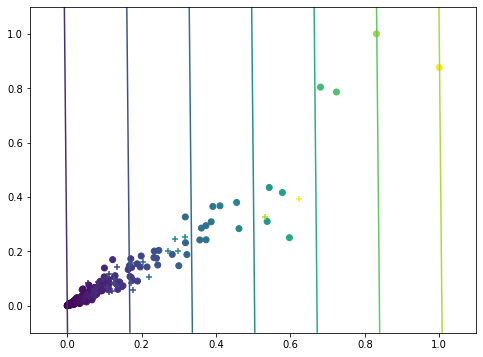

In [165]:
mlp = MLPRegressor(hidden_layer_sizes = (1), learning_rate='adaptive', solver = 'lbfgs', activation = 'identity', alpha=0.00001)
plot_reg_model(mlp, Xn, y);

In [94]:
mlp.predict([[100., 10.]])

array([8906281.59252862])

In [116]:
A = np.array( gdp_per_industry[['Base', 'Percent Change', 'Change','Average Annual Openings']])
b = np.array( gdp_per_industry['Projection'])

In [97]:
v = [0]*X.shape[1]
for k in range(X.shape[1]):
    M = X[:, k].max()
    m = X[:, k].min()
    v[k] = (X[:, k] - m)/(M - m)
Xn = np.c_[v].transpose()   # Note I could not assign these to X because the type was int not float


In [98]:
def fit_test_model(clf, X, y):
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rn.permutation(n)   
    X = X[perm]
    y = y[perm]
    X_test = X[:test]       # Then create the test
    y_test = y[:test]
    X_train = X[test:]     # and train sets
    y_train = y[test:]
    
    clf.fit(X_train, y_train) # Fit the model
    
    print('Training Error: {}'.format(clf.score(X_train, y_train)))
    print('Testing Error: {}'.format(clf.score(X_test, y_test)))

In [99]:
def plot_feature_importances(model, names, tol=10**-3):
    n_features = len(names)
    plot_names = []
    plot_importances = []
    
    for k in range(n_features):
        if model.feature_importances_[k] > tol:
            plot_names += [ names[k] ]
            plot_importances += [ model.feature_importances_[k] ]
    
    n_plot = len(plot_names)
    
    plt.figure(figsize = (10, 6))
    plt.barh(range(n_plot), plot_importances, align = 'center')
    plt.yticks(np.arange(n_plot), plot_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_plot)

In [117]:
keep = ['Base', 'Percent Change', 'Change','Average Annual Openings']

In [118]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=250, max_depth=5)
fit_test_model(clf, A, b)

Training Error: 0.45255474452554745
Testing Error: 0.19852941176470587


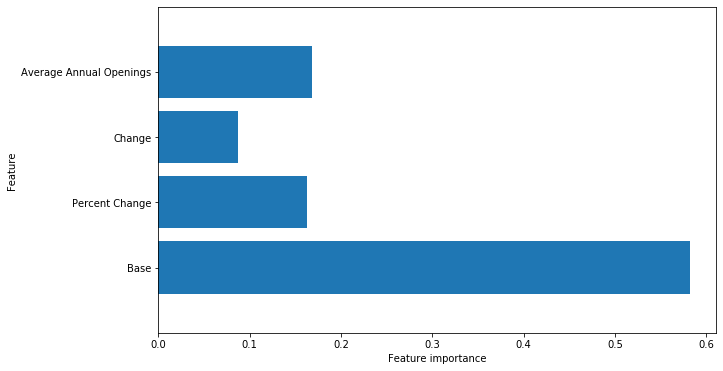

In [122]:
plot_feature_importances(clf, keep)